# 残差

time :  1000.0 continuityError :  0.00027211404


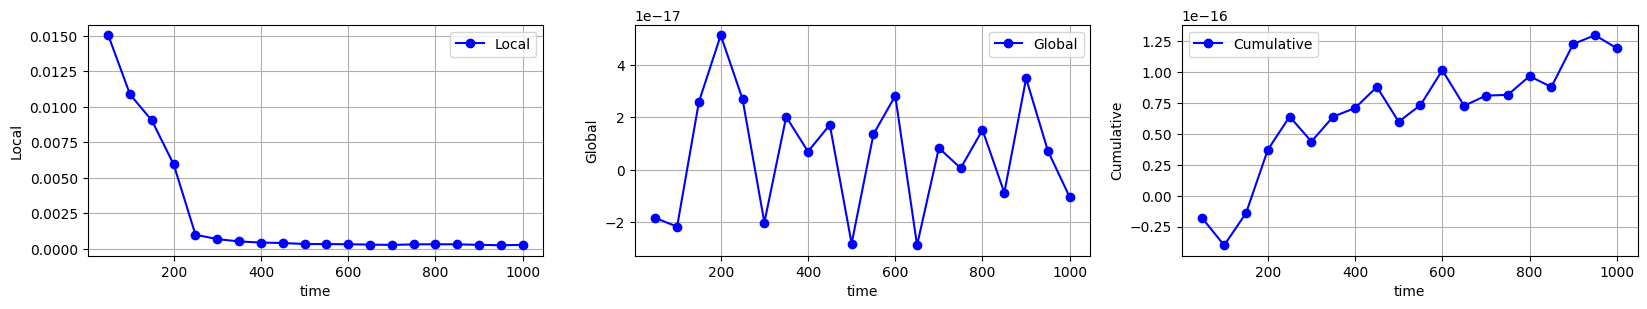

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def graph_func(df_continuityError, imin, imax, iposi,icol):
    plt.subplot(imin,imax,iposi)
    plt.plot(df_continuityError['time'],df_continuityError[icol],linestyle='solid',color='b',marker="o",label=icol)
    plt.xlabel('time')
    plt.ylabel(icol)
    plt.legend()
    plt.grid()

def df_continuityError_func(dir_):
    data_continuityError = np.loadtxt(f'./postProcessing/continuityError1/{dir_}/continuityError.dat')
    df_continuityError = pd.DataFrame(data_continuityError, columns=['time','Local','Global','Cumulative'])  
    return df_continuityError

def df_concat(dir_List):
    df = pd.DataFrame()
    for dir_ in dir_List:
        try:
            df_ = df_continuityError_func(dir_)
            df = pd.concat([df, df_])
        except Exception:
            print("Empty")
        
    return df

dir_List = os.listdir('./postProcessing/continuityError1')
df_continuityError = df_concat(dir_List)

plt.figure(figsize=(20,3))
graph_func(df_continuityError, 1,3,1,'Local')
graph_func(df_continuityError, 1,3,2,'Global')
graph_func(df_continuityError, 1,3,3,'Cumulative')

print('time : ',df_continuityError['time'].iloc[-1], 'continuityError : ', df_continuityError['Local'].iloc[-1])

df_continuityError.head()
plt.savefig("001_continuityError1.pdf",bbox_inches='tight')

# 残差

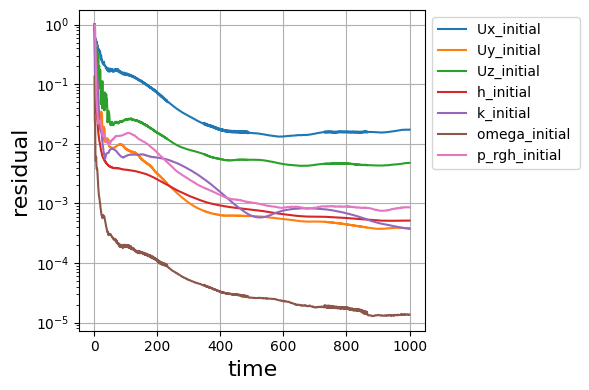

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def graph_layout():
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.yscale('log')
    plt.xlabel('time', fontsize=16)
    plt.ylabel('residual', fontsize=16)
    plt.tight_layout()
    plt.savefig("002_solverInfo.pdf")  # PDF出力に変更

def df_residual_func(dir_):
    df_residual = pd.read_table(
        f'./postProcessing/solverInfo/{dir_}/solverInfo.dat',
        skiprows=1
    )
    df_residual = pd.DataFrame(df_residual)
    return df_residual

def df_concat(dir_List):
    df = pd.DataFrame()
    for dir_ in dir_List:
        try:
            df_ = df_residual_func(dir_)
            df = pd.concat([df, df_])
        except Exception:
            print(f"Empty or unreadable: {dir_}")
    return df

dir_List = os.listdir('./postProcessing/solverInfo')
df_residual = df_concat(dir_List)

initial_residual = [col for col in df_residual.columns if "initial" in col]
final_residual = [col for col in df_residual.columns if "final" in col]

# グラフ描画
df_residual.plot(x="# Time        ", y=initial_residual, figsize=(6, 4))
graph_layout()


# 各ステップの流速と温度

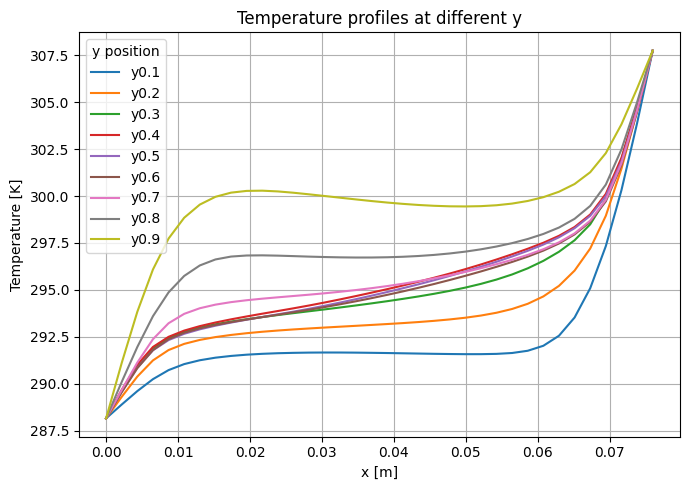

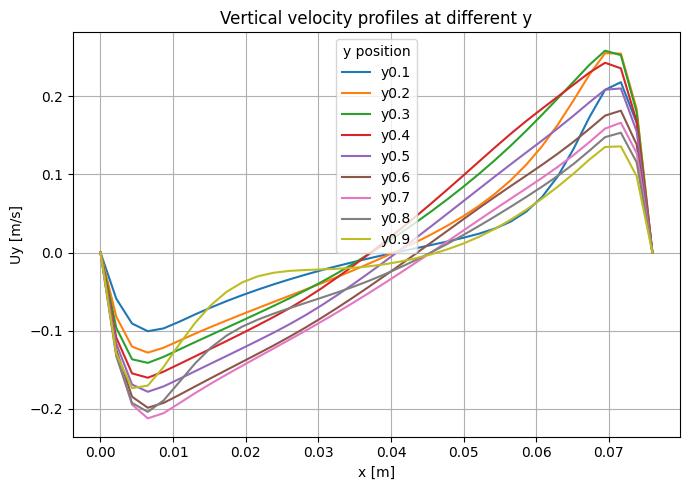

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 対象ディレクトリ
sample_dir = "./postProcessing/sample/1000"

# y位置を浮動小数でソートするための関数
def extract_y_value(file_name):
    try:
        return float(file_name.split("_")[0][1:])
    except:
        return 0

# 温度・速度の全データを格納
df_temp_all = []
df_vel_all = []

# .xyファイルを読み込み
if os.path.exists(sample_dir):
    for filename in sorted(os.listdir(sample_dir), key=extract_y_value):
        if filename.endswith(".xy"):
            file_path = os.path.join(sample_dir, filename)
            try:
                df = pd.read_csv(file_path, sep="\s+", header=None)
                df.columns = ["x", "T", "Ux", "Uy", "Uz"]
                y_label = os.path.basename(file_path).split("_")[0]  # 例: y0.1
                df_temp_all.append((df["x"], df["T"], y_label))
                df_vel_all.append((df["x"], df["Uy"], y_label))
            except Exception as e:
                print(f"{file_path} 読み込みエラー: {str(e)}")
else:
    print("sample/1000 ディレクトリが見つかりません")

# 温度プロファイルの描画
plt.figure(figsize=(7, 5))
for x, T, y_label in df_temp_all:
    plt.plot(x, T, label=y_label)
plt.xlabel("x [m]")
plt.ylabel("Temperature [K]")
plt.title("Temperature profiles at different y")
plt.legend(title="y position")
plt.grid()
plt.tight_layout()
plt.savefig("temperature_profiles_all.pdf")
plt.show()

# 速度プロファイルの描画
plt.figure(figsize=(7, 5))
for x, Uy, y_label in df_vel_all:
    plt.plot(x, Uy, label=y_label)
plt.xlabel("x [m]")
plt.ylabel("Uy [m/s]")
plt.title("Vertical velocity profiles at different y")
plt.legend(title="y position")
plt.grid()
plt.tight_layout()
plt.savefig("velocity_profiles_all.pdf")
plt.show()


C:\Users\kusum\AppData\Local\Temp\ipykernel_22020\3353394083.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


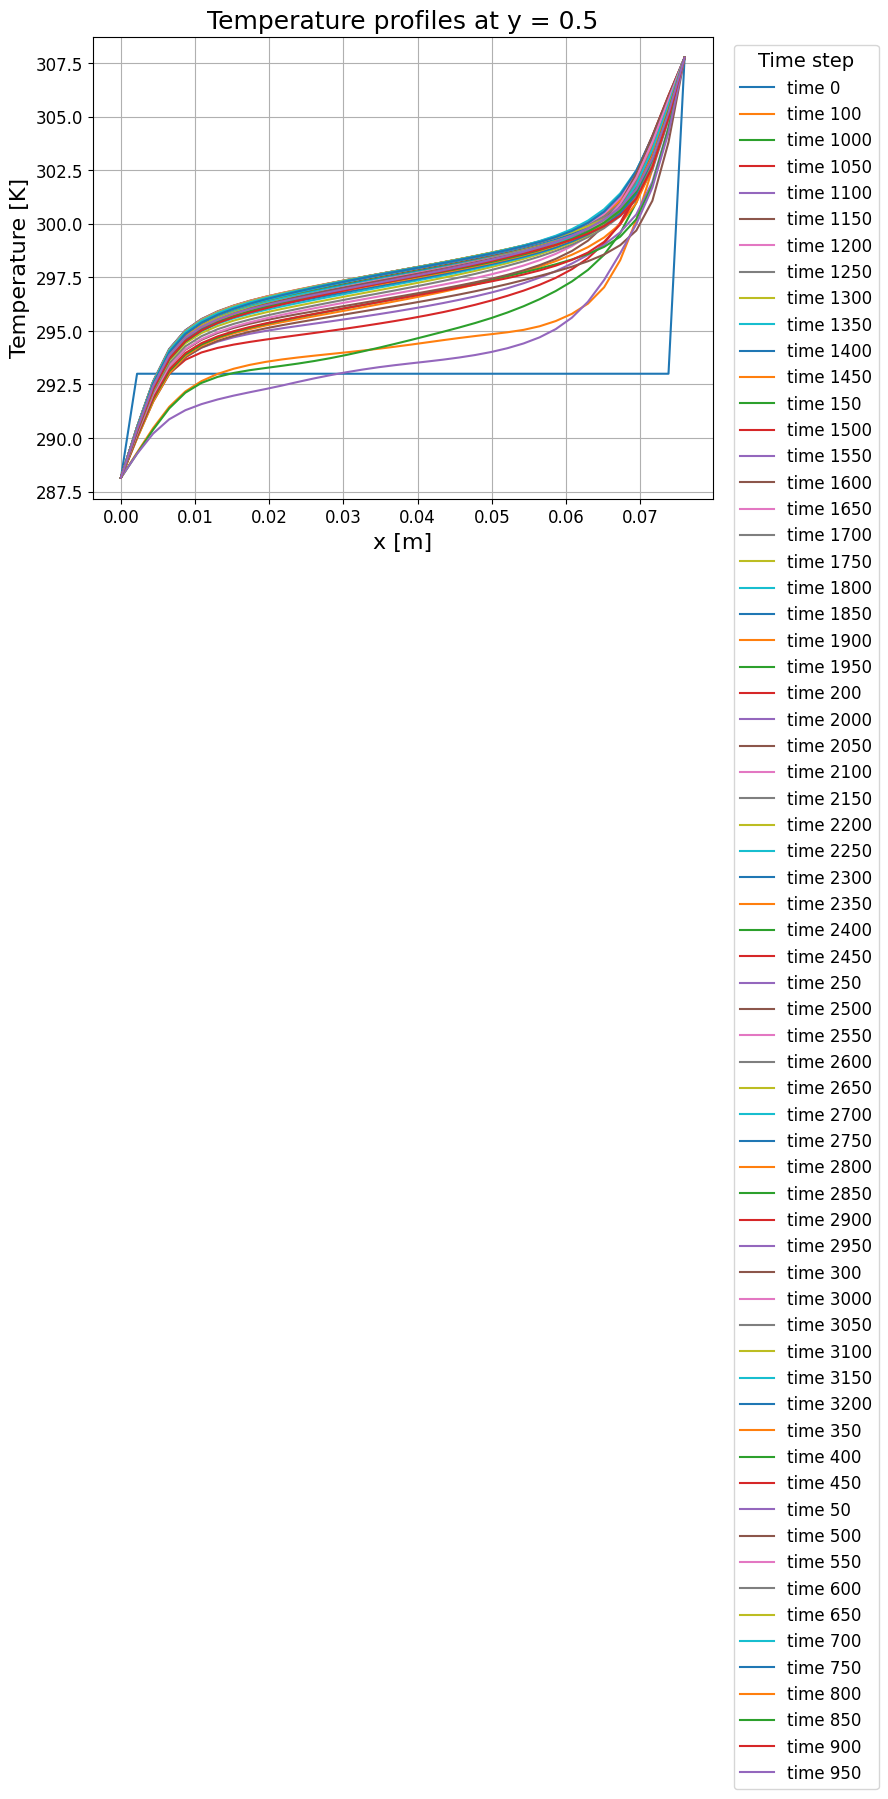

C:\Users\kusum\AppData\Local\Temp\ipykernel_22020\3353394083.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


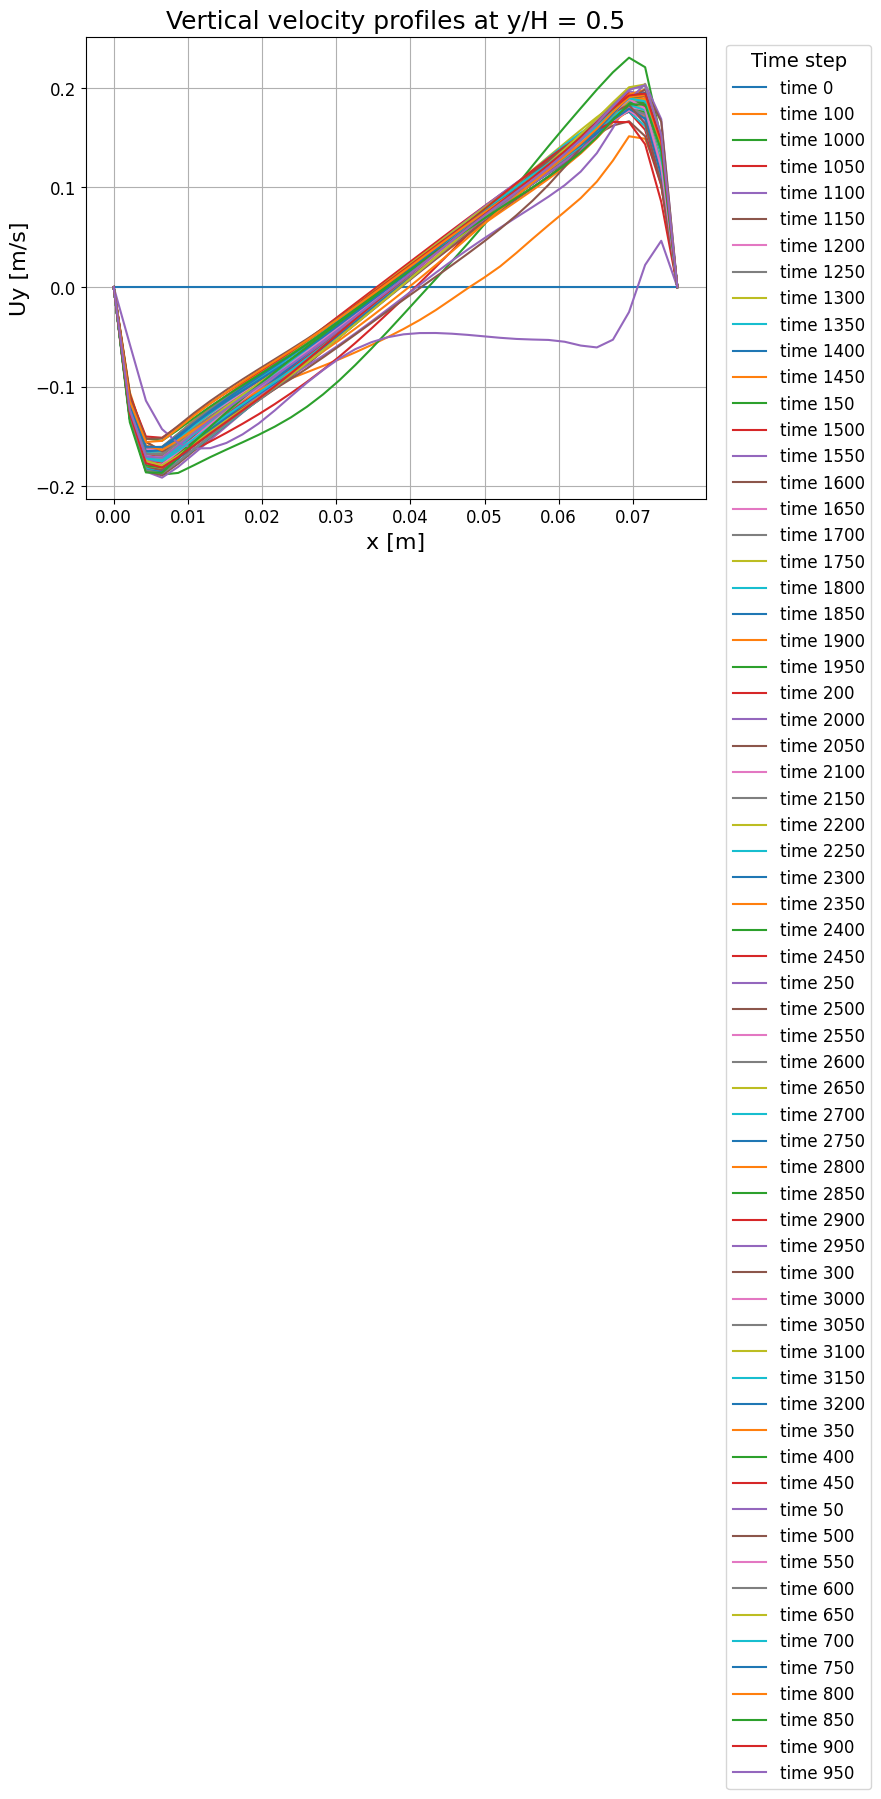

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 指定時刻ディレクトリと対象ファイル名
file_name = "y0.5_T_U.xy"
base_path = "./postProcessing/sample"
time_dirs = os.listdir(base_path)

# データを保持
temperature_profiles = []
velocity_profiles = []

# 各時刻のデータ読み込み
for time in time_dirs:
    file_path = os.path.join(base_path, time, file_name)
    try:
        df = pd.read_csv(file_path, sep="\s+", header=None)
        df.columns = ["x", "T", "Ux", "Uy", "Uz"]
        temperature_profiles.append((df["x"], df["T"], time))
        velocity_profiles.append((df["x"], df["Uy"], time))
    except Exception as e:
        print(f"{file_path} 読み込みエラー: {str(e)}")

# グラフ全体のフォントサイズを設定
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 18,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

# 温度プロファイルのプロット
plt.figure(figsize=(8, 6))
for x, T, time in temperature_profiles:
    plt.plot(x, T, label=f"time {time}")
plt.xlabel("x [m]")
plt.ylabel("Temperature [K]")
plt.title("Temperature profiles at y = 0.5")
plt.legend(title="Time step", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.grid()
plt.tight_layout()
plt.savefig("temperature_comparison_y05.pdf", bbox_inches="tight")
plt.show()

# 速度プロファイルのプロット
plt.figure(figsize=(8, 6))
for x, Uy, time in velocity_profiles:
    plt.plot(x, Uy, label=f"time {time}")
plt.xlabel("x [m]")
plt.ylabel("Uy [m/s]")
plt.title("Vertical velocity profiles at y/H = 0.5")
plt.legend(title="Time step", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.grid()
plt.tight_layout()
plt.savefig("velocity_comparison_y05.pdf", bbox_inches="tight")
plt.show()


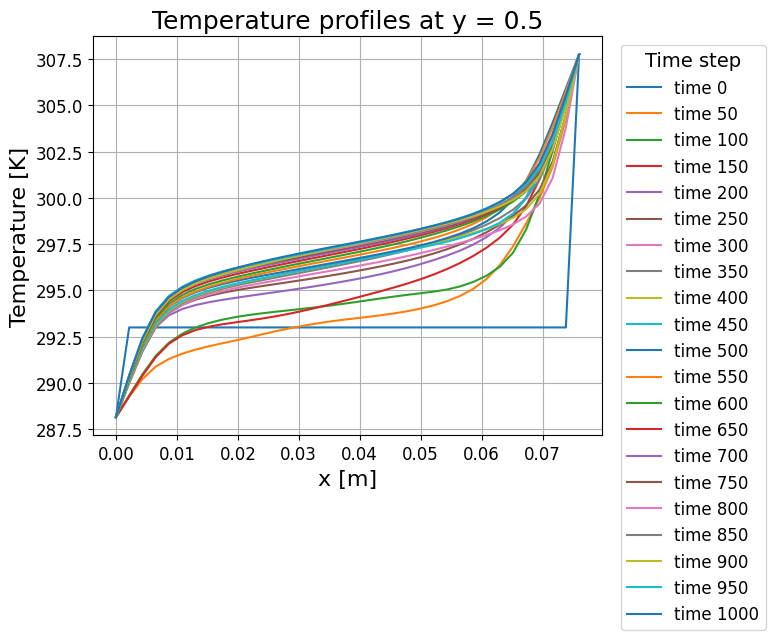

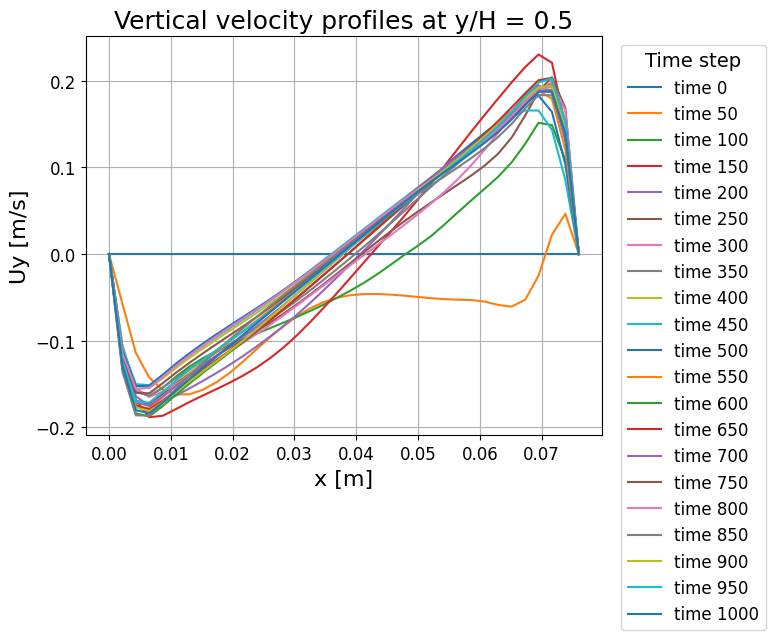

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 指定時刻ディレクトリと対象ファイル名
file_name = "y0.5_T_U.xy"
base_path = "./postProcessing/sample"
time_dirs = os.listdir(base_path)

# Time=1000以下のディレクトリだけ選ぶ（小数も考慮）
time_dirs = [t for t in time_dirs if t.replace('.', '', 1).isdigit() and float(t) <= 1000]

# データを保持
temperature_profiles = []
velocity_profiles = []

# 各時刻のデータ読み込み（時系列順にソートして読み込む）
for time in sorted(time_dirs, key=lambda x: float(x)):
    file_path = os.path.join(base_path, time, file_name)
    try:
        df = pd.read_csv(file_path, sep="\s+", header=None)
        df.columns = ["x", "T", "Ux", "Uy", "Uz"]
        temperature_profiles.append((df["x"], df["T"], time))
        velocity_profiles.append((df["x"], df["Uy"], time))
    except Exception as e:
        print(f"{file_path} 読み込みエラー: {str(e)}")

# グラフ全体のフォントサイズを設定
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 18,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

# 温度プロファイルのプロット
plt.figure(figsize=(8, 6))
for x, T, time in temperature_profiles:
    plt.plot(x, T, label=f"time {time}")
plt.xlabel("x [m]")
plt.ylabel("Temperature [K]")
plt.title("Temperature profiles at y = 0.5")
plt.legend(title="Time step", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.grid()
plt.tight_layout()
plt.savefig("temperature_comparison_y05.pdf", bbox_inches="tight")
plt.show()

# 速度プロファイルのプロット
plt.figure(figsize=(8, 6))
for x, Uy, time in velocity_profiles:
    plt.plot(x, Uy, label=f"time {time}")
plt.xlabel("x [m]")
plt.ylabel("Uy [m/s]")
plt.title("Vertical velocity profiles at y/H = 0.5")
plt.legend(title="Time step", loc="upper left", bbox_to_anchor=(1.02, 1))
plt.grid()
plt.tight_layout()
plt.savefig("velocity_comparison_y05.pdf", bbox_inches="tight")
plt.show()
